# Ocena jakości wina

Importujemy wymagane biblioteki

In [1]:
# Importujemy wymagane biblioteki
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, roc_auc_score
from pandas.plotting import scatter_matrix
from fastparquet import write, ParquetFile
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams.update({'font.size': 14})

Wczytywanie i wstępna obróbka danych

In [2]:
# Wczytujemy pliki wejsciowe
df_red = pd.read_csv("./dane/wina_czerwone.csv")
df_white = pd.read_csv("./dane/wina_biale.csv")

In [3]:
# Sprawdzamy zbiór danych dla win czerwonych
print('Wina czerwone')
print("Wiersze, kolumny: " + str(df_red.shape))

Wina czerwone
Wiersze, kolumny: (1598, 12)


In [4]:
# Wyświetlamy te dane (dla 5 pierwszych linii)
df_red.head()

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Brakuje nagłówków kolumn, stąd dodajemy te nagłówki bazując na otrzymanej informacji z instrukcji
df_red.columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide'
                ,'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Przyglądamy się danym dla win białych
print('Wina białe')
print("Wiersze, kolumny: " + str(df_white.shape))

Wina białe
Wiersze, kolumny: (4897, 12)


In [7]:
df_white.head()

,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [8]:
# Dodajemy nagłówki kolumn
df_white.columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [9]:
# Dodajemy dodatkową informację o kolorze wina
df_red['colour']='R'
df_white['colour']='W'

In [10]:
# Oba zbiory mają tę sama strukturę, stąd możemy je polączyc w jedną całość
df_all=pd.concat([df_red,df_white],axis=0)
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,R


In [11]:
# Dokonujemy oceny jakości i kompletności danych
def info(df_all, pred=None): 
    obs = df_all.shape[0]
    types = df_all.dtypes
    counts = df_all.apply(lambda x: x.count())
    uniques = df_all.apply(lambda x: x.unique())
    nulls = df_all.apply(lambda x: x.isnull().sum())
    distincts = df_all.apply(lambda x: x.unique().shape[0])
      
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'uniques']
        str = pd.concat([types, counts, distincts, nulls, uniques], axis = 1)

    else:
       
        str = pd.concat([types, counts, distincts, nulls, uniques], axis = 1, sort=False)
        cols = ['types', 'counts', 'distincts', 'nulls', 'uniques']
    
    str.columns = cols
    return str
details = info(df_all)
details.sort_values(by='distincts', ascending=False)

,types,counts,distincts,nulls,uniques
density,float64,6495,998,0,"[0.9968, 0.997, 0.998, 0.9978, 0.9964, 0.9946,..."
residual sugar,float64,6495,316,0,"[2.6, 2.3, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ..."
total sulfur dioxide,float64,6495,276,0,"[67.0, 54.0, 60.0, 34.0, 40.0, 59.0, 21.0, 18...."
chlorides,float64,6495,214,0,"[0.098, 0.092, 0.075, 0.076, 0.069, 0.065, 0.0..."
volatile acidity,float64,6495,187,0,"[0.88, 0.76, 0.28, 0.7, 0.66, 0.6, 0.65, 0.58,..."
free sulfur dioxide,float64,6495,135,0,"[25.0, 15.0, 17.0, 11.0, 13.0, 9.0, 16.0, 52.0..."
sulphates,float64,6495,111,0,"[0.68, 0.65, 0.58, 0.56, 0.46, 0.47, 0.57, 0.8..."
alcohol,float64,6495,111,0,"[9.8, 9.4, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3..."
pH,float64,6495,108,0,"[3.2, 3.26, 3.16, 3.51, 3.3, 3.39, 3.36, 3.35,..."
fixed acidity,float64,6495,106,0,"[7.8, 11.2, 7.4, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,..."


In [12]:
# Sprawdzamy charakterystyki statystyczne każdej cechy dla wina białego i czerwonego
subset_attributes = df_all.columns
rs = round(df_all.loc[df_all.colour == 'R', subset_attributes].describe(),2)
ws = round(df_all.loc[df_all.colour == 'W', subset_attributes].describe(),2)
pd.concat([rs], axis=0, keys=['Wina czerwone']).T

Wina czerwone                                           \
                             count   mean    std   min    25%    50%    75%   
fixed acidity               1598.0   8.32   1.74  4.60   7.10   7.90   9.20   
volatile acidity            1598.0   0.53   0.18  0.12   0.39   0.52   0.64   
citric acid                 1598.0   0.27   0.19  0.00   0.09   0.26   0.42   
residual sugar              1598.0   2.54   1.41  0.90   1.90   2.20   2.60   
chlorides                   1598.0   0.09   0.05  0.01   0.07   0.08   0.09   
free sulfur dioxide         1598.0  15.88  10.46  1.00   7.00  14.00  21.00   
total sulfur dioxide        1598.0  46.48  32.90  6.00  22.00  38.00  62.00   
density                     1598.0   1.00   0.00  0.99   1.00   1.00   1.00   
pH                          1598.0   3.31   0.15  2.74   3.21   3.31   3.40   
sulphates                   1598.0   0.66   0.17  0.33   0.55   0.62   0.73   
alcohol                     1598.0  10.42   1.07  8.40   9.50  10.20  11.10   
quality                     1598.0   5.64   0.81  3.00   5.00   6.00   6.00   

                              
                         max  
fixed acidity          15.90  
volatile acidity        1.58  
citric acid             1.00  
residual sugar         15.50  
chlorides               0.61  
free sulfur dioxide    72.00  
total sulfur dioxide  289.00  
density                 1.00  
pH                      4.01  
sulphates               2.00  
alcohol                14.90  
quality                 8.00

In [13]:
pd.concat([ws], axis=0, keys=['Wina białe']).T

Wina białe                                               \
                          count    mean    std   min     25%     50%     75%   
fixed acidity            4897.0    6.85   0.84  3.80    6.30    6.80    7.30   
volatile acidity         4897.0    0.28   0.10  0.08    0.21    0.26    0.32   
citric acid              4897.0    0.33   0.12  0.00    0.27    0.32    0.39   
residual sugar           4897.0    6.39   5.07  0.60    1.70    5.20    9.90   
chlorides                4897.0    0.05   0.02  0.01    0.04    0.04    0.05   
free sulfur dioxide      4897.0   35.31  17.01  2.00   23.00   34.00   46.00   
total sulfur dioxide     4897.0  138.35  42.50  9.00  108.00  134.00  167.00   
density                  4897.0    0.99   0.00  0.99    0.99    0.99    1.00   
pH                       4897.0    3.19   0.15  2.72    3.09    3.18    3.28   
sulphates                4897.0    0.49   0.11  0.22    0.41    0.47    0.55   
alcohol                  4897.0   10.51   1.23  8.00    9.50   10.40   11.40   
quality                  4897.0    5.88   0.89  3.00    5.00    6.00    6.00   

                              
                         max  
fixed acidity          14.20  
volatile acidity        1.10  
citric acid             1.66  
residual sugar         65.80  
chlorides               0.35  
free sulfur dioxide   289.00  
total sulfur dioxide  440.00  
density                 1.04  
pH                      3.82  
sulphates               1.08  
alcohol                14.20  
quality                 9.00

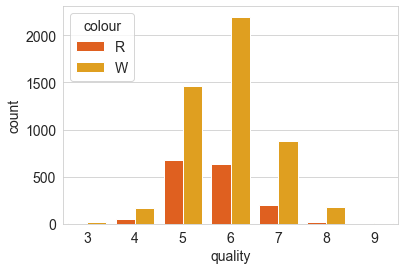

In [14]:
# Porównujemy wina czerwone z białymi na podstawie oceny jakościowej (quality) - rozkład jakości
ax = sns.countplot(x="quality", hue= "colour", data=df_all, palette="autumn")
plt.show ()

<AxesSubplot:>

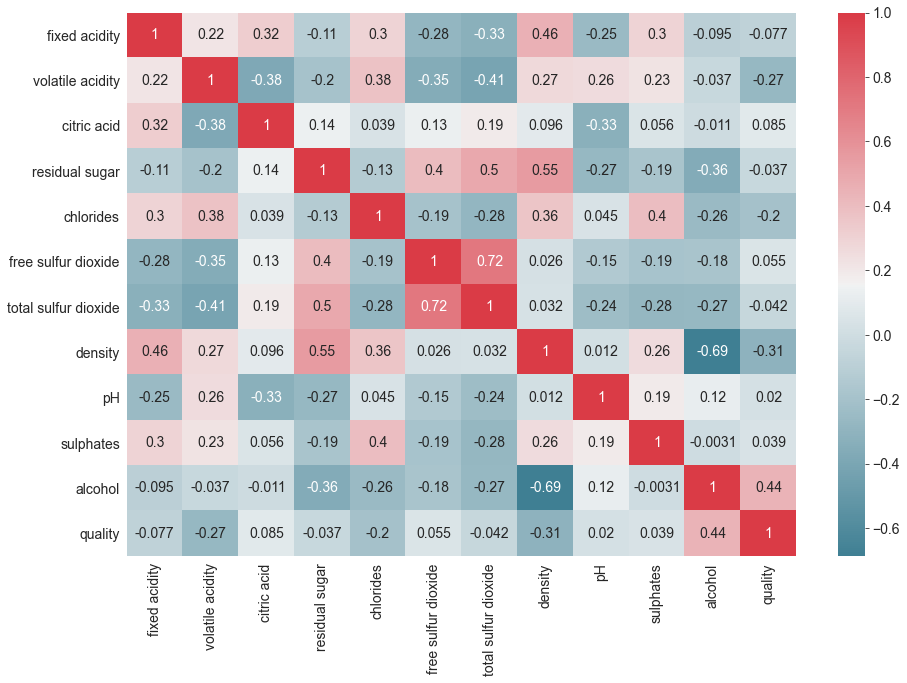

In [15]:
# Korelacja pomiędzy cechami w odniesieniu do oceny jakościowej wina (współczynnik korelacji Pearsona)
corr = df_all.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

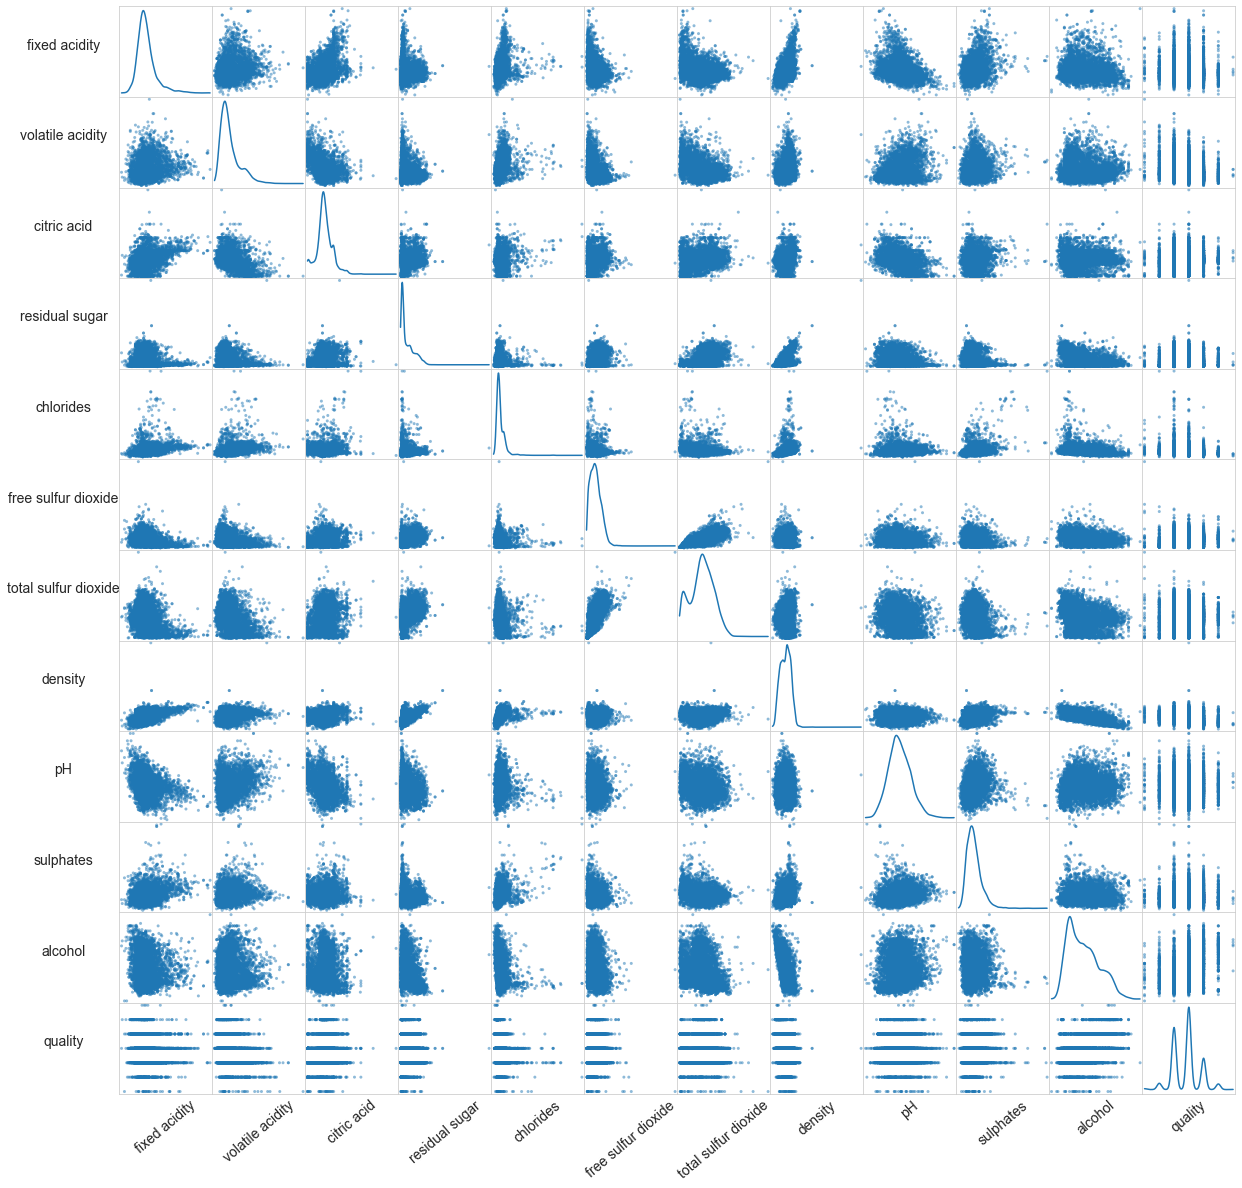

In [16]:
# Badanie zależności par cech za pomocą macierzy rozproszonej
sm = scatter_matrix(df_all, figsize=(20, 20), diagonal='kde')
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

In [17]:
# Zamieniamy dane kategoryczne dla koloru wina na zmienną numeryczną
label_colour = LabelEncoder()
df_all['colour'] = label_colour.fit_transform(df_all['colour'])
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [18]:
# Oddzielamy zmienne obiaśniające od zmiennej celu (z. obiaśnianej)
X = df_all.copy()
y = X.pop('quality')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [19]:
# Dzielimy dane na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

In [20]:
# Sprawdzamy rozmiary obydwu zbiorów
print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (5196, 12)
X_test shape: (1299, 12)
y_trian shape: (5196,)
y_test shape: (1299,)


Standaryzacja

In [21]:
# Standaryzacja zmiennych, czyli usunięcie ich średnich i dzieląc przez odchylenie standardowe 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [23]:
X_train_sc

array([[-0.48196414, -0.0583375 , -0.54250163, ..., -0.08309056,
        -1.07350162,  0.57260931],
       [-0.25156141, -0.36161078, -0.26681386, ...,  0.18300409,
        -0.06256322,  0.57260931],
       [ 3.20447955,  1.73097487,  2.35221989, ...,  3.04352161,
         2.38053793, -1.74639145],
       ...,
       [ 4.35649321,  0.06297181,  1.18054689, ...,  0.84824072,
         1.28535466, -1.74639145],
       [ 2.820475  , -0.11899216,  1.38731272, ...,  1.58000102,
         0.86413032, -1.74639145],
       [-0.02115868,  0.06297181, -0.47357969, ...,  0.84824072,
        -0.14680808,  0.57260931]])

In [24]:
# Zmieniamy na obiekt Data frame
X_train_sc = pd.DataFrame(X_train_sc,columns = X_train.columns, index=X_train.index)
X_test_sc = pd.DataFrame(X_test_sc,columns = X_test.columns, index=X_test.index)
X_train_sc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour
2458,-0.481964,-0.058337,-0.542502,2.221930,-0.313787,0.031673,0.554290,1.162998,-0.862163,-0.083091,-1.073502,0.572609
3820,-0.251561,-0.361611,-0.266814,1.416555,-0.397642,1.228570,0.412636,0.165544,-1.174384,0.183004,-0.062563,0.572609
377,3.204480,1.730975,2.352220,0.161426,0.888127,-1.393204,-1.623639,1.355839,-0.674831,3.043522,2.380538,-1.746391
474,1.822063,2.064575,-0.542502,-0.675326,0.860176,-1.450200,-1.552812,1.355839,-0.487499,0.449099,-0.231053,-1.746391
428,-0.097960,-0.179647,1.042703,1.709419,-0.006321,1.342560,1.439626,1.023354,-0.737275,-0.282662,-0.989257,0.572609
...,...,...,...,...,...,...,...,...,...,...,...,...
4101,-0.251561,0.184281,-0.611424,0.851747,0.021631,1.342560,0.890718,0.318487,0.074498,-0.748327,-0.399543,0.572609
952,0.746850,-0.664884,0.353484,-0.863596,-0.397642,0.487634,0.023088,-0.639069,-1.424160,-1.147469,-0.399543,0.572609
537,4.356493,0.062972,1.180547,0.077751,0.273194,-1.450200,-1.428865,2.220299,-0.112834,0.848241,1.285355,-1.746391
1220,2.820475,-0.118992,1.387313,-0.759001,2.117993,-0.766258,-1.269504,0.870412,0.386718,1.580001,0.864130,-1.746391


Modelowanie

Regresja liniowa wielu zmiennych - szukamy najlepszego modelu

In [25]:
# Macierz ewaluacji
evaluation = pd.DataFrame({'Model': [],
                           'Szczegóły':[],
                           'MSE_śr_CV10':[],
                           'MSE_odch_std':[]
                           })

In [26]:
# Funkcja oceny modelu (MSE) funkcja kosztu im mniejsza tym lepiej stanowi w rzeczywistości przeciwieństwo MSE dlatego '- scores'
def check_model(name, details, model, X, Y):
  scores = cross_val_score(model, X, Y, scoring = "neg_mean_squared_error", cv=10)
  cv = (-scores)
  return [{'Model': name, 'Szczegóły': details, 
           'MSE_śr_CV10' : cv.mean(),
           'MSE_odch_std' : cv.std(),
           }]

In [27]:
model_0 = linear_model.LinearRegression()
evaluation = evaluation.append(check_model('Regresja liniowa', 'wszystkie cechy', model_0, X_train_sc, y_train))
evaluation

,Model,Szczegóły,MSE_śr_CV10,MSE_odch_std
0,Regresja liniowa,wszystkie cechy,0.543169,0.029866


In [28]:
# Odrzucamy zmienne mocno skorelowane ze sobą 'total sulfur dioxide' i 'free sulfur dioxide'

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides','density', 'pH', 'sulphates', 'alcohol', 'colour']
X = X_train_sc[features]
y_train
model_1 = linear_model.LinearRegression()
evaluation = evaluation.append(check_model('Regresja liniowa', 'bez FSD , TSD', model_1, X, y_train))
evaluation

,Model,Szczegóły,MSE_śr_CV10,MSE_odch_std
0,Regresja liniowa,wszystkie cechy,0.543169,0.029866
0,Regresja liniowa,"bez FSD , TSD",0.547772,0.031271


In [29]:
# Korzystamy ze wszystkich zmiennych i dokonujemy regularyzacji - Lasso

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'colour']

X = X_train_sc[features]
y_train
model_lasso = linear_model.Lasso(alpha=0.01)
evaluation = evaluation.append(check_model("Regresja liniowa (Lasso)", "wszystkie cechy", model_lasso, X, y_train))
evaluation

,Model,Szczegóły,MSE_śr_CV10,MSE_odch_std
0,Regresja liniowa,wszystkie cechy,0.543169,0.029866
0,Regresja liniowa,"bez FSD , TSD",0.547772,0.031271
0,Regresja liniowa (Lasso),wszystkie cechy,0.548952,0.031405


Regresja oparta o drzewa decyzyjne

In [30]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'colour']

X = X_train_sc[features]
y_train

model_tree = DecisionTreeRegressor(max_depth=5)
evaluation = evaluation.append(check_model("Drzewa decyzyjne", "głębokość = 5 ", model_tree, X, y_train))
evaluation

,Model,Szczegóły,MSE_śr_CV10,MSE_odch_std
0,Regresja liniowa,wszystkie cechy,0.543169,0.029866
0,Regresja liniowa,"bez FSD , TSD",0.547772,0.031271
0,Regresja liniowa (Lasso),wszystkie cechy,0.548952,0.031405
0,Drzewa decyzyjne,głębokość = 5,0.552867,0.038861


Regresja oparta o lasy losowe

In [31]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'colour']

X = X_train_sc[features]
y_train

forest_reg = RandomForestRegressor(max_depth=5)
evaluation = evaluation.append(check_model("Lasy losowe", "głębokość = 5", forest_reg, X, y_train))
evaluation

,Model,Szczegóły,MSE_śr_CV10,MSE_odch_std
0,Regresja liniowa,wszystkie cechy,0.543169,0.029866
0,Regresja liniowa,"bez FSD , TSD",0.547772,0.031271
0,Regresja liniowa (Lasso),wszystkie cechy,0.548952,0.031405
0,Drzewa decyzyjne,głębokość = 5,0.552867,0.038861
0,Lasy losowe,głębokość = 5,0.505165,0.030041


In [32]:
forest_reg.fit(X_train_sc,y_train)
y_pred = forest_reg.predict(X_test_sc)

In [33]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE wynosi: {mse:.4f}')

MSE wynosi: 0.4786


<AxesSubplot:>

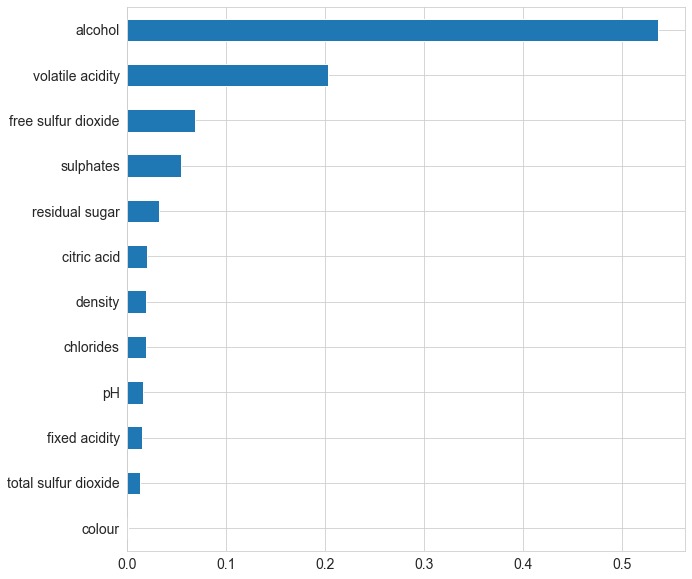

In [34]:
feat_importances = pd.Series(forest_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(25).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))

Klasyfikacja

In [35]:
X = df_all.drop(['quality'], axis = 1)
y = df_all['quality']

In [36]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (6495, 12)
y shape: (6495,)


In [37]:
# Tworzymy zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [38]:
# Standaryzacja
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Drzewa decyzyjne

In [39]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
# Sprawdzamy model uczący i testowy
tree_clf.score(X_train,y_train), tree_clf.score(X_test,y_test) 

(1.0, 0.581986143187067)

In [41]:
# Sprawdzamy domyślne hiperparametry
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [42]:
# Przeszukujemy przestrzeń hiperparametrów w celu uzyskania najlepszego wyniku weryfikacji krzyżowej
hyperparameters = {'max_depth' : [5,6,7,8,9,10,11,12,13,14,15,16,17], 'max_features': [1,2,3], 'class_weight' : ['balanced']}
tree_best_clf = GridSearchCV(DecisionTreeClassifier(), hyperparameters, n_jobs = -1,scoring='accuracy', cv=5)
tree_best_clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17],
                         'max_features': [1, 2, 3]},
             scoring='accuracy')

In [43]:
# Wyświetlamy najlepsze parametry
tree_best_clf.best_params_

{'class_weight': 'balanced', 'max_depth': 17, 'max_features': 2}

In [44]:
# Oceniamy model
tree_best_clf.score(X_train,y_train), tree_best_clf.score(X_test,y_test)

(0.7465357967667436, 0.45727482678983833)

In [45]:
# Tworzymy macierz pomyłek
y_pred_tree = tree_best_clf.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_tree)

array([[  0,   0,   3,   0,   0,   0,   0],
       [  1,  11,  19,  15,   5,   1,   0],
       [  3,  21, 230, 122,  31,  10,   0],
       [  2,  20, 141, 263,  97,  68,   0],
       [  2,   3,  20,  58,  69,  43,   0],
       [  0,   0,   1,   4,  14,  21,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

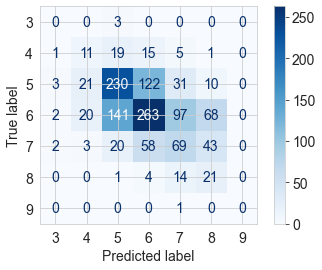

In [46]:
metrics.plot_confusion_matrix(tree_best_clf,X_test, y_test,values_format='.0f',cmap=plt.cm.Blues)

In [47]:
# Sprawdzamy wyuczony model na zbiorze testowym
print(metrics.classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.20      0.21      0.21        52
           5       0.56      0.55      0.55       417
           6       0.57      0.45      0.50       591
           7       0.32      0.35      0.33       195
           8       0.15      0.53      0.23        40
           9       0.00      0.00      0.00         1

    accuracy                           0.46      1299
   macro avg       0.26      0.30      0.26      1299
weighted avg       0.50      0.46      0.47      1299



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Obliczamy ROC
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = preprocessing.LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)

In [49]:
print(f'ROC AUC score : {multiclass_roc_auc_score(y_test,y_pred_tree)}')

ROC AUC score : 0.5946317003621585


<AxesSubplot:>

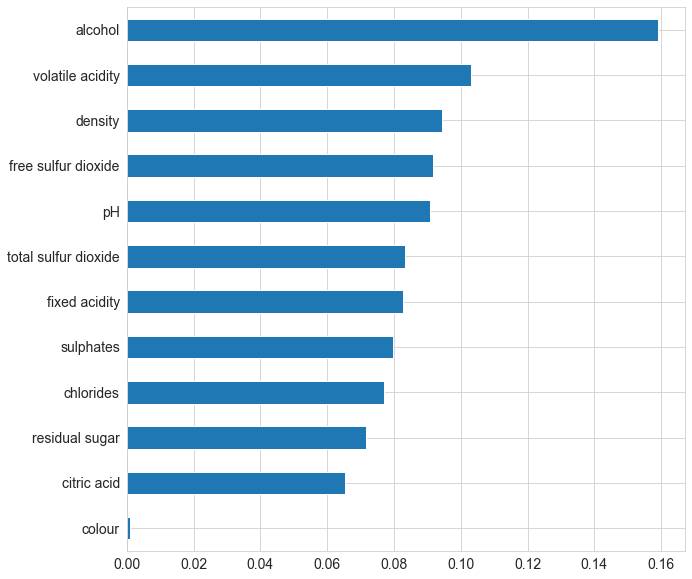

In [50]:
feat_importances = pd.Series(tree_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))

Lasy losowe

In [51]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
# Sprawdzamy model uczący i testowy
forest_clf.score(X_train,y_train), forest_clf.score(X_test,y_test) 

(1.0, 0.6759045419553503)

In [53]:
# Sprawdzamy domyślne hiperparametry
forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
hyperparameters = {'max_depth' : [5,6,7,8,9,10,11,12], 'n_estimators': [100, 130, 140, 175],'min_samples_leaf':[1,2,3,4],
                   'class_weight' : ['balanced']}
forest_best_clf = GridSearchCV(RandomForestClassifier(), hyperparameters, n_jobs = -1,scoring='accuracy', cv=5)
forest_best_clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [100, 130, 140, 175]},
             scoring='accuracy')

In [55]:
# Wyświetlamy najlepsze parametry
forest_best_clf.best_params_

{'class_weight': 'balanced',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'n_estimators': 140}

In [56]:
# Oceniamy model
forest_best_clf.score(X_train,y_train), forest_best_clf.score(X_test,y_test)

(0.9028098537336413, 0.6312548113933796)

In [57]:
# Tworzymy macierz pomyłek
y_pred_forest = forest_best_clf.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_forest)

array([[  0,   0,   2,   1,   0,   0,   0],
       [  0,   6,  26,  20,   0,   0,   0],
       [  0,   4, 306,  96,  11,   0,   0],
       [  0,   3, 143, 367,  76,   2,   0],
       [  0,   0,   8,  62, 122,   3,   0],
       [  0,   0,   0,   7,  14,  19,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

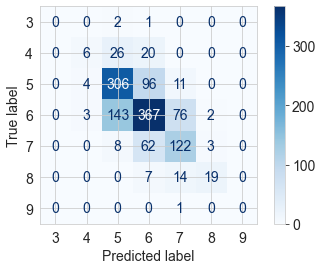

In [58]:
metrics.plot_confusion_matrix(forest_best_clf,X_test, y_test,values_format='.0f',cmap=plt.cm.Blues)

In [59]:
# Sprawdzamy wyuczony model na zbiorze testowym
print(metrics.classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.46      0.12      0.18        52
           5       0.63      0.73      0.68       417
           6       0.66      0.62      0.64       591
           7       0.54      0.63      0.58       195
           8       0.79      0.47      0.59        40
           9       0.00      0.00      0.00         1

    accuracy                           0.63      1299
   macro avg       0.44      0.37      0.38      1299
weighted avg       0.63      0.63      0.62      1299



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Obliczamy ROC
print(f'ROC AUC score : {multiclass_roc_auc_score(y_test,y_pred_forest)}')

ROC AUC score : 0.6430845775267073


<AxesSubplot:>

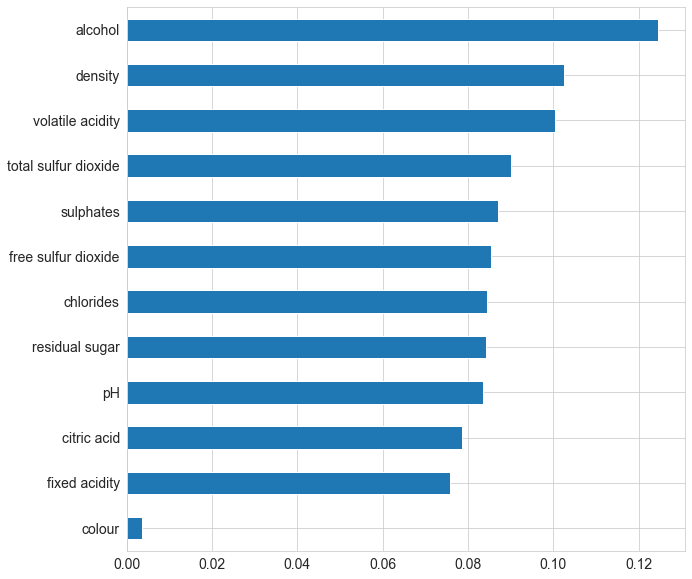

In [61]:
feat_importances = pd.Series(forest_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))

Maszyny wektorów nośnych (SVM) z klasyfikatorem SVC

In [62]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [63]:
# Sprawdzamy model uczący i testowy
svc.score(X_train,y_train), svc.score(X_test,y_test) 

(0.6041185527328714, 0.5835257890685143)

In [64]:
hyperparameters = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
best_svc = GridSearchCV(SVC(), hyperparameters, n_jobs = -1, cv=5)
best_svc.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']})

In [65]:
# Wyświetlamy najlepsze parametry
best_svc.best_params_

{'C': 1.2, 'gamma': 1.4, 'kernel': 'rbf'}

In [66]:
# Oceniamy model
best_svc.score(X_train,y_train), best_svc.score(X_test,y_test)

(0.9522709776751347, 0.6581986143187067)

In [67]:
# Tworzymy macierz pomyłek
y_pred_svc = best_svc.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_svc)

array([[  0,   0,   1,   2,   0,   0,   0],
       [  0,   4,  14,  34,   0,   0,   0],
       [  0,   1, 254, 160,   2,   0,   0],
       [  0,   0,  89, 481,  21,   0,   0],
       [  0,   0,   4,  89, 101,   1,   0],
       [  0,   0,   0,  16,   9,  15,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

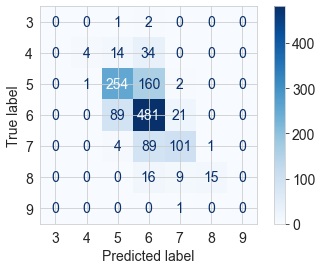

In [68]:
metrics.plot_confusion_matrix(best_svc,X_test, y_test,values_format='.0f',cmap=plt.cm.Blues)

In [69]:
# Sprawdzamy wyuczony model na zbiorze testowym
print(metrics.classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.80      0.08      0.14        52
           5       0.70      0.61      0.65       417
           6       0.62      0.81      0.70       591
           7       0.75      0.52      0.61       195
           8       0.94      0.38      0.54        40
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1299
   macro avg       0.54      0.34      0.38      1299
weighted avg       0.68      0.66      0.64      1299



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print(f'ROC AUC score : {multiclass_roc_auc_score(y_test,y_pred_svc)}')

ROC AUC score : 0.6295558257518478


In [1]:
# Opracowane przez: 
# Łukasz Marchlewicz
# Łukasz Morawiec
# Toruń 2020